# **Data Inspection**

## Objectives

1. Examine & describe data.
2. Develop strategy for answering business requirements.

## Inputs

1. House_prices_records.csv
2. Inherited_houses.csv

## Outputs

1. Understand data sets.

---

# Change working directory

* We are assuming you will store the notebooks in a subfolder, therefore when running the notebook in the editor, you will need to change the working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir


'/workspace/Heritage-Housing/jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")


You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir


'/workspace/Heritage-Housing'

# Load and analyse data

House Price Records

In [4]:
import numpy as np
import pandas as pd

house_prices_df = pd.read_csv(
    f"outputs/datasets/collection/house_prices_records.csv"
    )
house_prices_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   1stFlrSF       1460 non-null   int64  
 1   2ndFlrSF       1374 non-null   float64
 2   BedroomAbvGr   1361 non-null   float64
 3   BsmtExposure   1460 non-null   object 
 4   BsmtFinSF1     1460 non-null   int64  
 5   BsmtFinType1   1346 non-null   object 
 6   BsmtUnfSF      1460 non-null   int64  
 7   EnclosedPorch  136 non-null    float64
 8   GarageArea     1460 non-null   int64  
 9   GarageFinish   1298 non-null   object 
 10  GarageYrBlt    1379 non-null   float64
 11  GrLivArea      1460 non-null   int64  
 12  KitchenQual    1460 non-null   object 
 13  LotArea        1460 non-null   int64  
 14  LotFrontage    1201 non-null   float64
 15  MasVnrArea     1452 non-null   float64
 16  OpenPorchSF    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  OverallQ

Use describe function for further insight.

In [5]:
house_prices_df.describe()


,1stFlrSF,2ndFlrSF,BedroomAbvGr,BsmtFinSF1,BsmtUnfSF,EnclosedPorch,GarageArea,GarageYrBlt,GrLivArea,LotArea,LotFrontage,MasVnrArea,OpenPorchSF,OverallCond,OverallQual,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,SalePrice
count,1460.000000,1374.000000,1361.000000,1460.000000,1460.000000,136.000000,1460.000000,1379.000000,1460.000000,1460.000000,1201.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,155.000000,1460.000000,1460.000000,1460.000000
mean,1162.626712,348.524017,2.869214,443.639726,567.240411,25.330882,472.980137,1978.506164,1515.463699,10516.828082,70.049958,103.685262,46.660274,5.575342,6.099315,1057.429452,103.741935,1971.267808,1984.865753,180921.195890
std,386.587738,438.865586,0.820115,456.098091,441.866955,66.684115,213.804841,24.689725,525.480383,9981.264932,24.284752,181.066207,66.256028,1.112799,1.382997,438.705324,135.543152,30.202904,20.645407,79442.502883
min,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1900.000000,334.000000,1300.000000,21.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1872.000000,1950.000000,34900.000000
25%,882.000000,0.000000,2.000000,0.000000,223.000000,0.000000,334.500000,1961.000000,1129.500000,7553.500000,59.000000,0.000000,0.000000,5.000000,5.000000,795.750000,0.000000,1954.000000,1967.000000,129975.000000
50%,1087.000000,0.000000,3.000000,383.500000,477.500000,0.000000,480.000000,1980.000000,1464.000000,9478.500000,69.000000,0.000000,25.000000,5.000000,6.000000,991.500000,0.000000,1973.000000,1994.000000,163000.000000
75%,1391.250000,728.000000,3.000000,712.250000,808.000000,0.000000,576.000000,2002.000000,1776.750000,11601.500000,80.000000,166.000000,68.000000,6.000000,7.000000,1298.250000,182.500000,2000.000000,2004.000000,214000.000000
max,4692.000000,2065.000000,8.000000,5644.000000,2336.000000,286.000000,1418.000000,2010.000000,5642.000000,215245.000000,313.000000,1600.000000,547.000000,9.000000,10.000000,6110.000000,736.000000,2010.000000,2010.000000,755000.000000


We produce the plots below to examine the distribution of all features. It will be extremely useful to know this when it comes to processing the data later.

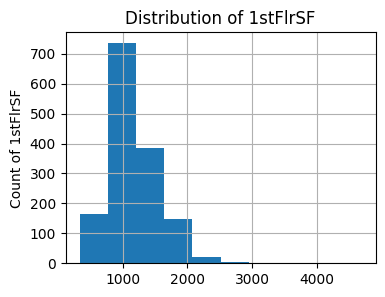

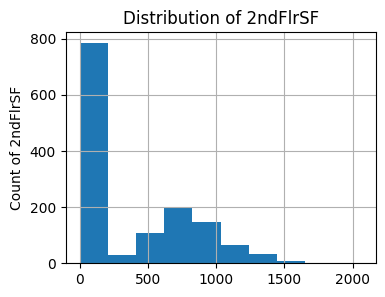

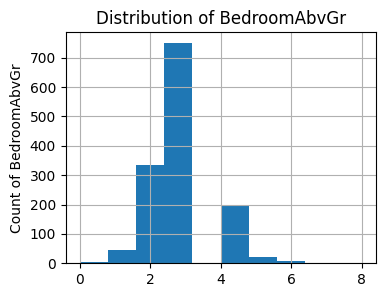

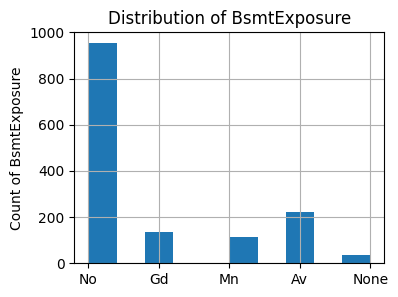

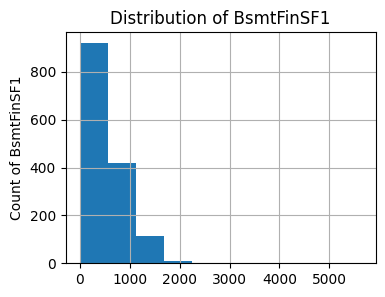

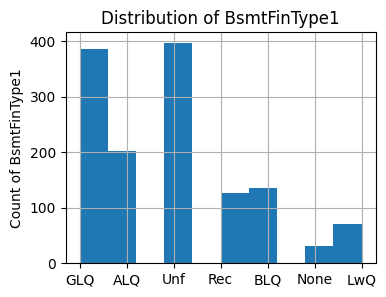

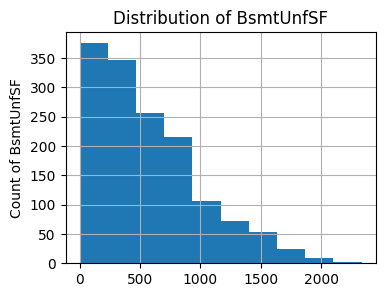

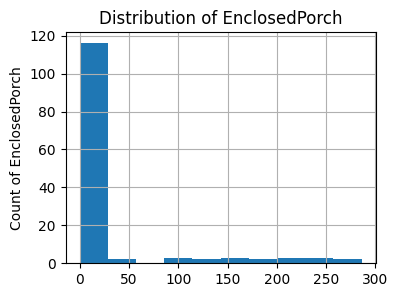

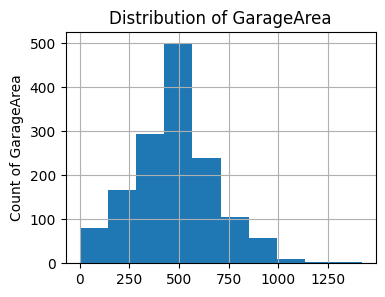

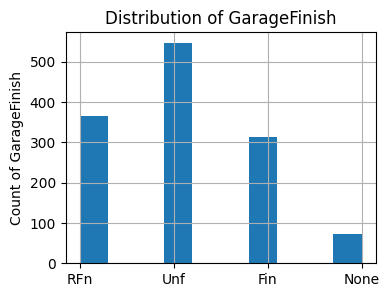

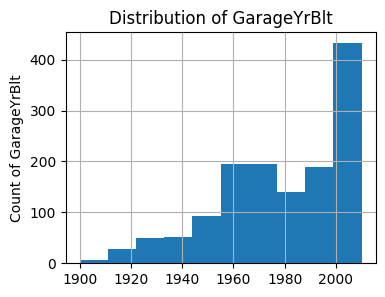

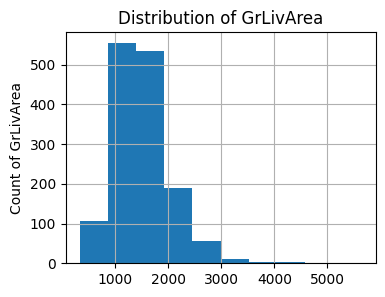

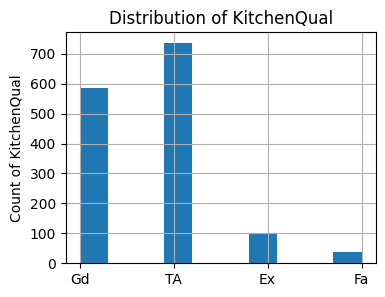

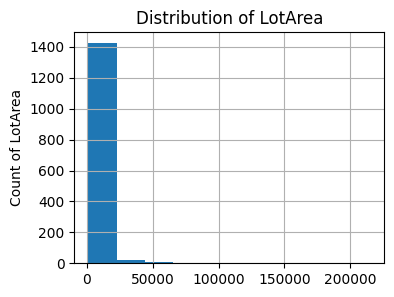

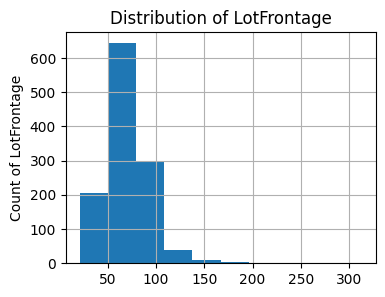

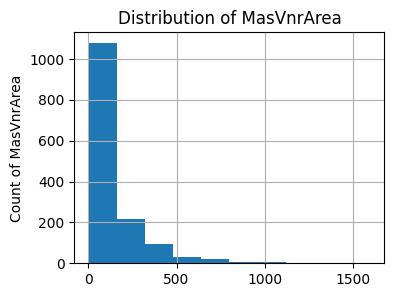

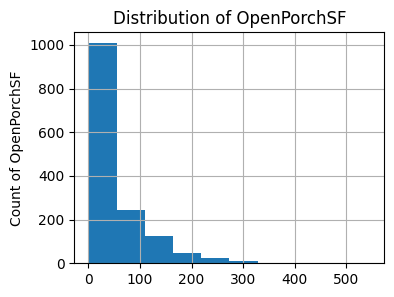

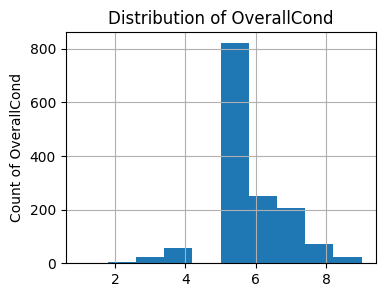

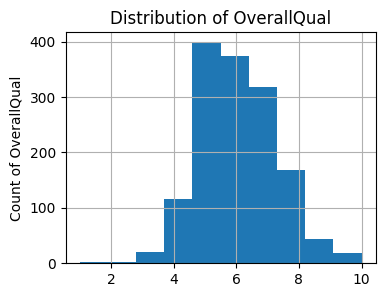

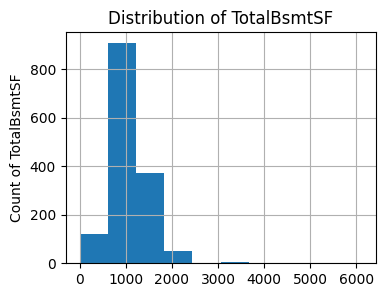

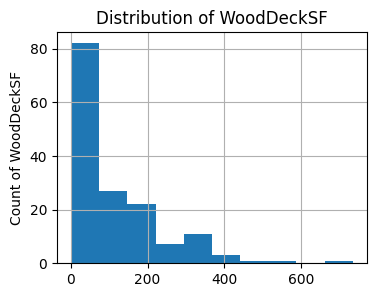

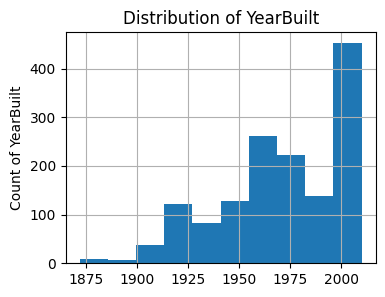

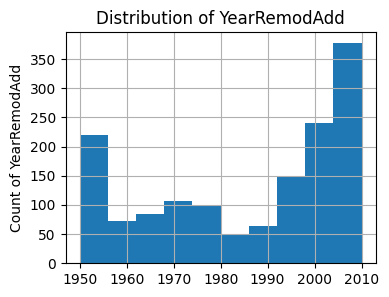

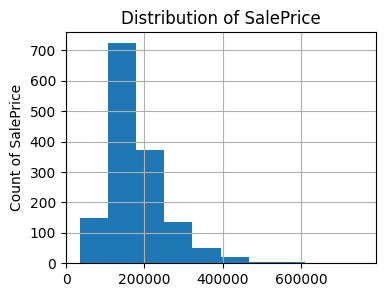

In [6]:
import matplotlib.pyplot as plt

features_to_examine = house_prices_df
features_to_examine.drop('SalePrice', axis=1)
for features in features_to_examine:
    features_to_examine[features].hist(figsize=(4, 3))
    plt.title(f'Distribution of {features}')
    plt.ylabel(f'Count of {features}')
    plt.show()


Inherited houses

In [7]:
inherited_houses_df = pd.read_csv(
    f"outputs/datasets/collection/inherited_houses.csv"
    )
inherited_houses_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   1stFlrSF       4 non-null      int64  
 1   2ndFlrSF       4 non-null      int64  
 2   BedroomAbvGr   4 non-null      int64  
 3   BsmtExposure   4 non-null      object 
 4   BsmtFinSF1     4 non-null      float64
 5   BsmtFinType1   4 non-null      object 
 6   BsmtUnfSF      4 non-null      float64
 7   EnclosedPorch  4 non-null      int64  
 8   GarageArea     4 non-null      float64
 9   GarageFinish   4 non-null      object 
 10  GarageYrBlt    4 non-null      float64
 11  GrLivArea      4 non-null      int64  
 12  KitchenQual    4 non-null      object 
 13  LotArea        4 non-null      int64  
 14  LotFrontage    4 non-null      float64
 15  MasVnrArea     4 non-null      float64
 16  OpenPorchSF    4 non-null      int64  
 17  OverallCond    4 non-null      int64  
 18  OverallQual   

In [8]:
inherited_houses_df.head()


,1stFlrSF,2ndFlrSF,BedroomAbvGr,BsmtExposure,BsmtFinSF1,BsmtFinType1,BsmtUnfSF,EnclosedPorch,GarageArea,GarageFinish,...,LotArea,LotFrontage,MasVnrArea,OpenPorchSF,OverallCond,OverallQual,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd
0,896,0,2,No,468.0,Rec,270.0,0,730.0,Unf,...,11622,80.0,0.0,0,6,5,882.0,140,1961,1961
1,1329,0,3,No,923.0,ALQ,406.0,0,312.0,Unf,...,14267,81.0,108.0,36,6,6,1329.0,393,1958,1958
2,928,701,3,No,791.0,GLQ,137.0,0,482.0,Fin,...,13830,74.0,0.0,34,5,5,928.0,212,1997,1998
3,926,678,3,No,602.0,GLQ,324.0,0,470.0,Fin,...,9978,78.0,20.0,36,6,6,926.0,360,1998,1998


Pandas profiling report

### Observations.

1. house_prices_records.csv is the publicly sourced data set provided by the client. It has 1460 rows and 24 columns. Each row is a separate entry for a house. The SalesPrice is our target and the other 23 are variables.

2. inherited_houses.csv is the data for the houses the client has inherited. It has 4 rows and 23 columns. Each row is an entry for a house. Business objective two is to predict a SalesPrice for this data set.

3. Other than inherited_houses.csv missing a column for SalesPrice, the columns are identical between both sets of data and in the same order. We view this data as Missing Completely At Random(MCAR). There is no clear explanation of why the data is missing and there appears to be no relationship between the missing data and the complete data.

4. The data types for particular columns are not the same across data sets.

5. 9.8% of data in the house_prices_records.csv file is missing. The inherited_houses.csv data is complete.

6. SalePrice is the target variable. Data is normally distributed and positively skewed.

7. Other than SalePrice, the data can be broken down into three categories. Data related to the size of the house, data related to the condition of the house and data related to the date of the house.

8. 1stFlrSF, 2ndFlrSF, BedroomAbvGr, BsmtFinSF1, BsmtUnfSF, TotalBsmtSF, GarageArea, GrLivArea, LotArea, LotFrontage, MasVnrArea, EnclosedPorch, OpenPorchSF, WoodDeckSF are quantitative measurements which relate to the size of the house or particular features of the house.

9. BsmtExposure, BsmtFinType1, GarageFinish, KitchenQual, OverallCond, OverallQual are categorical variables related to the finish and quality of the house.

10. GarageYrBlt, YearBuilt, YearRemodAdd are dates related to building and renovation.

11. In house_prices_records.csv, variables related to the size of the house are normally distributed and positively skewed.

12. In house_prices_records.csv, variables related to the condition of the house are of the house are normally distributed.

13. In house_prices_records.csv, variables related to the age of the house are normally distributed and negatively skewed in favour of newer houses

14. There are several variables where there is a rating of zero, which we may take to mean the feature is absent.

15. in YearRemodAdd 12.2% of houses have a remodel date of 1950. This is atypical of the data which is otherwise negatively skewed.

16. KitchenQual does not have the full range of permitted inputs. There is no observation with a rating of Po: Poor. There are no observations missing data so nowhere to reasonably impute this. As there are no observations in the inherited house case with this rating we can create our model based on this reduced range. 

---

# Preliminary visualisation

We can run some additional visualisations on some of the fields in order to support our investigations. I have chosen 1stFlrSF, BedroomAbvGr, OverallCond and YearBuilt gainst SalesPrice. These represent a cross section of catagories (house size, condition and age) and are not missing any data. Although we can see how they correlate with house price we are not yet testing hypothosis.

[Text(0.5, 1.0, 'Scatter plot of SalePrice and First Floor square feet')]

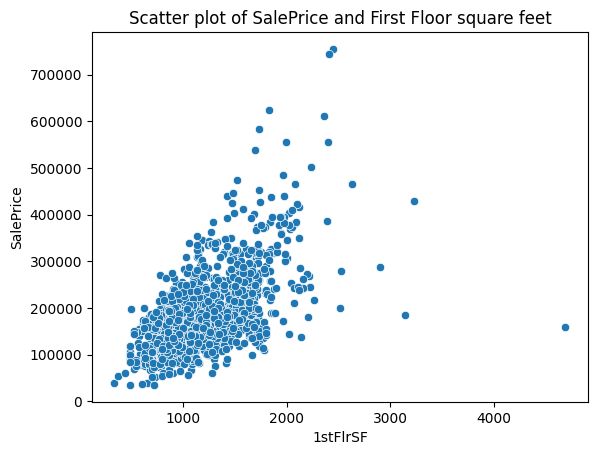

In [ ]:
import seaborn as sns

sns.scatterplot(
    x="1stFlrSF",
    y="SalePrice",
    data=house_prices_df
    ).set(
        title='Scatter plot of SalePrice and First Floor square feet'
        )


The data follows the hypothesised pattern of a positive correlation between price and size of the house, whith some outliers. The variance is larger as house size increases.

[Text(0.5, 1.0, 'Scatter plot of SalePrice and overall condition of home')]

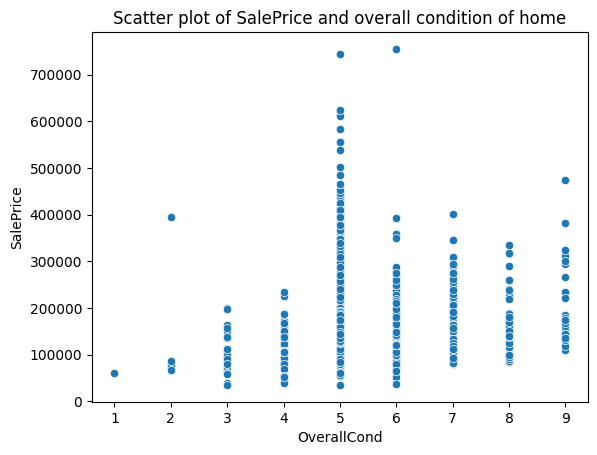

In [16]:
sns.scatterplot(
    x="OverallCond",
    y="SalePrice",
    data=house_prices_df
    ).set(
        title='Scatter plot of SalePrice and overall condition of home'
        )


The data follows the hypothesised positive correlation between price and overall condition, but very weakly, with some houses in excellent and very excellent (8 & 9) being sold for the same price as houses in poor condition (2). Indeed the highest sales price is for houses in average or above average condition (5 & 6). Again the variance is significant. There are a few outliers.

[Text(0.5, 1.0, 'Scatter plot of SalePrice and year house built')]

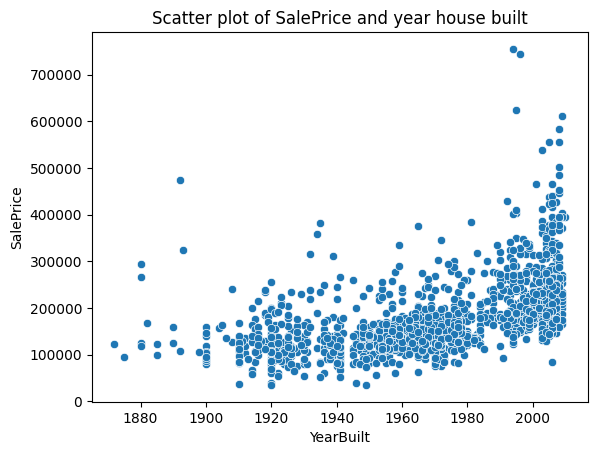

In [10]:
sns.scatterplot(
    x="YearBuilt",
    y="SalePrice",
    data=house_prices_df
    ).set(
        title='Scatter plot of SalePrice and year house built'
        )


The data refutes the hypothosis that there is no correlation between the age and price of the house, although the variance is again considerable. There are again outliers. 

---

# Missing data.

Find out extent of missing data for each column in house_prices_df.

In [18]:
house_prices_df.isnull().sum()


1stFlrSF            0
2ndFlrSF           86
BedroomAbvGr       99
BsmtExposure        0
BsmtFinSF1          0
BsmtFinType1      114
BsmtUnfSF           0
EnclosedPorch    1324
GarageArea          0
GarageFinish      162
GarageYrBlt        81
GrLivArea           0
KitchenQual         0
LotArea             0
LotFrontage       259
MasVnrArea          8
OpenPorchSF         0
OverallCond         0
OverallQual         0
TotalBsmtSF         0
WoodDeckSF       1305
YearBuilt           0
YearRemodAdd        0
SalePrice           0
dtype: int64

Only 17 rows have every variable.

In [19]:
rows_without_missing_data = house_prices_df.dropna()
rows_without_missing_data.shape[0]


17

There are no duplicate rows.

In [20]:
house_prices_df.duplicated().value_counts()


False    1460
dtype: int64

### Observations.
1. There are only 17 rows without missing variables. Far too small a sample size to train a model. We will have to develop strategies to impute at least some missing data.

2. EnclosedPorch and WoodDeckSF are missing have 90.7% and 89.4% of the data respectively.

3. There are no duplicate rows.

---

# Outliers

As seen in the investigations above there are a number of outliers in each column. The below investigations were completed.

The below investigation gives a count of the outliers based on the inter quartile range. Note that at this stage this is only for investagative purposes to give an approxamate idea of the number of outliers. This will help inform our data cleaning.

In [21]:
def find_outliers_IQR(df):
    """
    Function to find outliers. Takes the dataframe and returns variables
    which are lower than the lower quartile -1.5 IQR and higher than the
    upper quartile + 1 IQR, This function is taken from an article here:
    https://careerfoundry.com/en/blog/data-analytics/how-to-find-outliers/
    #finding-outliers
    """
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    IQR = q3-q1
    outliers = df[((df < (q1-1.5*IQR)) | (df > (q3+1.5*IQR)))]
    return outliers


find_outliers_IQR(house_prices_df).count()


1stFlrSF          20
2ndFlrSF           2
BedroomAbvGr      34
BsmtExposure       0
BsmtFinSF1         7
BsmtFinType1       0
BsmtUnfSF         29
EnclosedPorch     20
GarageArea        21
GarageFinish       0
GarageYrBlt        0
GrLivArea         31
KitchenQual        0
LotArea           69
LotFrontage       88
MasVnrArea        96
OpenPorchSF       77
OverallCond      125
OverallQual        2
TotalBsmtSF       61
WoodDeckSF         3
YearBuilt          7
YearRemodAdd       0
SalePrice         61
dtype: int64

In addition to the above programmatic inquiry, our inspection has also highlighted the below.

#### Houses showing as having been remodelled in the 1950's.

This feature is normally distributed with a negative skew, excepting that there was a large number of houses remodelled in the early 1950's. Our data set notes that where no remodelling has taken place the the date of construction is given instead (there is no missing data in this variable). We will have to be aware of this discrepancy in later stages. The price correlation study and smart correlation study will provide further insight.

[Text(0.5, 1.0, 'Histogram of date houses remodelled.')]

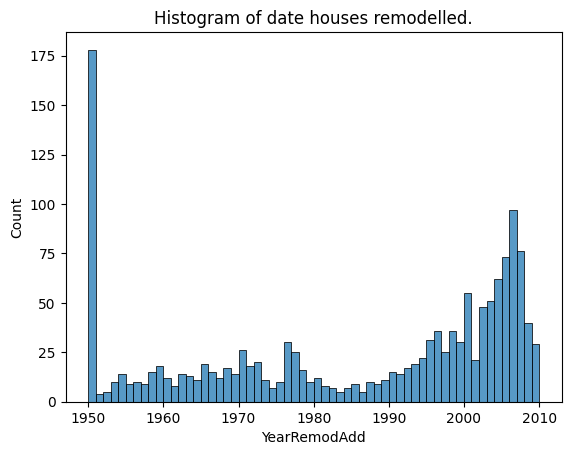

In [22]:
sns.histplot(
    x="YearRemodAdd",
    data=house_prices_df,
    bins=60
    ).set(
        title='Histogram of date houses remodelled.'
        )


#### Variables returning Zeros.

A number of columns are showing variables with a value of zero. Based on the variables we will interpret this to mean that the house doesn't have this attribute, rather than that the attribute hasn't been recorded. It is realistic for a house not to have a second floor. Ratings of zero in LotFrontage would arouse suspicion, however! We want the absence of features in some houses to be reflected when we impute missing data.

In [23]:
(house_prices_df == 0).sum()


1stFlrSF           0
2ndFlrSF         781
BedroomAbvGr       6
BsmtExposure       0
BsmtFinSF1       467
BsmtFinType1       0
BsmtUnfSF        118
EnclosedPorch    116
GarageArea        81
GarageFinish       0
GarageYrBlt        0
GrLivArea          0
KitchenQual        0
LotArea            0
LotFrontage        0
MasVnrArea       861
OpenPorchSF      656
OverallCond        0
OverallQual        0
TotalBsmtSF       37
WoodDeckSF        78
YearBuilt          0
YearRemodAdd       0
SalePrice          0
dtype: int64